# Use Random Forest to prepare a model on fraud data 
# treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
fraudcheck=pd.read_csv("C:\\Users\\Anjana\\Desktop\\DS Assignments\\Random Forest\\Fraud_check.csv")

In [4]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
fraudcheck.shape

(600, 6)

In [6]:
fraudcheck.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [7]:
fraudcheck.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [8]:
fraudcheck.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [9]:
fraudcheck.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


<AxesSubplot:xlabel='Undergrad', ylabel='count'>

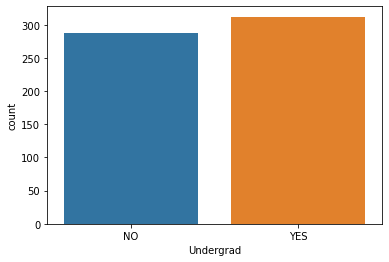

In [10]:
sns.countplot("Undergrad",data=fraudcheck)

<AxesSubplot:xlabel='Marital.Status', ylabel='count'>

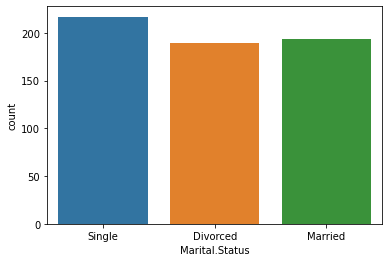

In [11]:
sns.countplot("Marital.Status",data=fraudcheck)

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

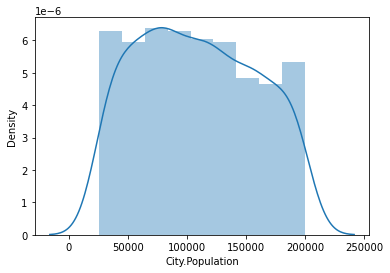

In [12]:
sns.distplot(fraudcheck['City.Population'])

<AxesSubplot:xlabel='Urban', ylabel='Taxable.Income'>

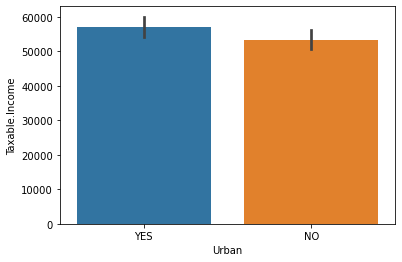

In [13]:
sns.barplot("Urban","Taxable.Income",data=fraudcheck)


<AxesSubplot:xlabel='Marital.Status', ylabel='Taxable.Income'>

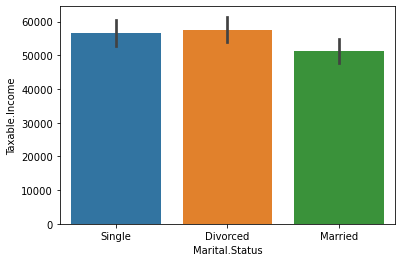

In [14]:
sns.barplot("Marital.Status","Taxable.Income",data=fraudcheck)

In [15]:
fraudcheck[fraudcheck['Taxable.Income']<=30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
10,NO,Single,29732,102602,19,YES
12,NO,Divorced,11794,148033,14,YES
16,YES,Divorced,24987,34551,29,NO
19,NO,Single,10987,126953,30,YES
21,YES,Divorced,14310,29106,7,YES
...,...,...,...,...,...,...
544,NO,Single,29916,133877,21,YES
557,YES,Married,12810,157421,10,NO
567,YES,Single,16316,129912,30,NO
575,NO,Divorced,10735,95975,13,YES


In [16]:
fraudcheck[fraudcheck['Taxable.Income']>30000]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [17]:
fraudcheck['tax_category']=' '

In [18]:
fraudcheck.loc[fraudcheck['Taxable.Income']>30000,'tax_category']='Good'
fraudcheck.loc[fraudcheck['Taxable.Income']<=30000,'tax_category']='Risky'

In [19]:
fraudcheck

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [20]:
#converting categorical data into numeric
from sklearn.preprocessing import LabelEncoder

In [21]:
label=LabelEncoder()

In [22]:
fraudcheck['Undergrad']=label.fit_transform(fraudcheck['Undergrad'])
fraudcheck['Marital.Status']=label.fit_transform(fraudcheck['Marital.Status'])
fraudcheck['Urban']=label.fit_transform(fraudcheck['Urban'])
fraudcheck['tax_category']=label.fit_transform(fraudcheck['tax_category'])

In [23]:
fraudcheck.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_category
0,0,2,68833,50047,10,1,0
1,1,0,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,2,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0


<AxesSubplot:xlabel='tax_category', ylabel='count'>

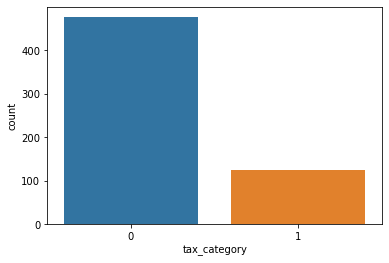

In [24]:
sns.countplot("tax_category",data=fraudcheck)

In [25]:
fraudcheck.dtypes

Undergrad          int32
Marital.Status     int32
Taxable.Income     int64
City.Population    int64
Work.Experience    int64
Urban              int32
tax_category       int32
dtype: object

In [26]:
#train test split
from sklearn.model_selection import train_test_split

In [27]:
x=fraudcheck.drop(columns=["Taxable.Income","tax_category"],axis=1)
y=fraudcheck[["tax_category"]]

In [28]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [29]:
y

,tax_category
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [31]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [32]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [33]:
#Randomforest
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_model=RandomForestClassifier(random_state=1)

In [35]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [36]:
y_train_pred=rf_model.predict(x_train)

In [37]:
y_test_pred=rf_model.predict(x_test)

In [38]:
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,classification_report,confusion_matrix

In [39]:
accuracy_score(y_train,y_train_pred)

1.0

In [40]:
accuracy_score(y_test,y_test_pred)

0.7666666666666667

In [41]:
confusion_matrix(y_test,y_test_pred)

array([[92,  5],
       [23,  0]], dtype=int64)

In [42]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        97
           1       0.00      0.00      0.00        23

    accuracy                           0.77       120
   macro avg       0.40      0.47      0.43       120
weighted avg       0.65      0.77      0.70       120



In [43]:
# Bagged Decision Trees for Classification

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Bagging
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
cart = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator=cart, n_estimators=2000, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7466666666666667


In [45]:
# AdaBoost Classification
from sklearn.ensemble import AdaBoostClassifier

In [46]:
kfold = KFold(n_splits=10, random_state=7,shuffle=True)
model = AdaBoostClassifier(n_estimators=10, random_state=7)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7933333333333332
